Epoch 1/5
391/391 [==============================] - 12s 29ms/step - loss: 0.4298 - accuracy: 0.8128 - val_loss: 0.3121 - val_accuracy: 0.8652
Epoch 2/5
391/391 [==============================] - 14s 35ms/step - loss: 0.2285 - accuracy: 0.9102 - val_loss: 0.2964 - val_accuracy: 0.8758
Epoch 3/5
391/391 [==============================] - 12s 30ms/step - loss: 0.1756 - accuracy: 0.9343 - val_loss: 0.3319 - val_accuracy: 0.8647
Epoch 4/5
391/391 [==============================] - 11s 29ms/step - loss: 0.1429 - accuracy: 0.9476 - val_loss: 0.3604 - val_accuracy: 0.8623
Epoch 5/5
782/782 [==============================] - 2s 2ms/step - loss: 0.4063 - accuracy: 0.8594
Test Accuracy: 0.8594


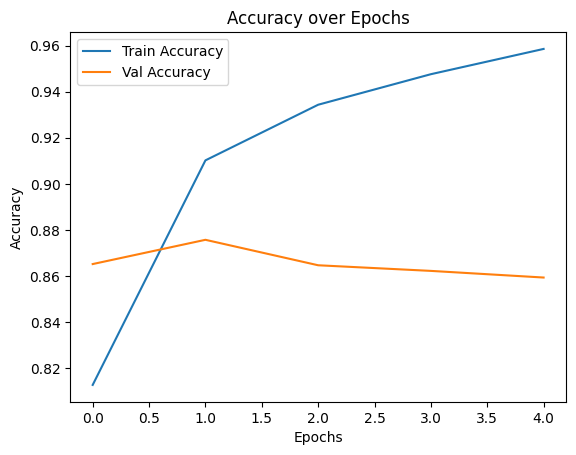

782/782 [==============================] - 2s 3ms/step

Classification Report:
               precision    recall  f1-score   support

    Negative       0.86      0.86      0.86     12500
    Positive       0.86      0.86      0.86     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000



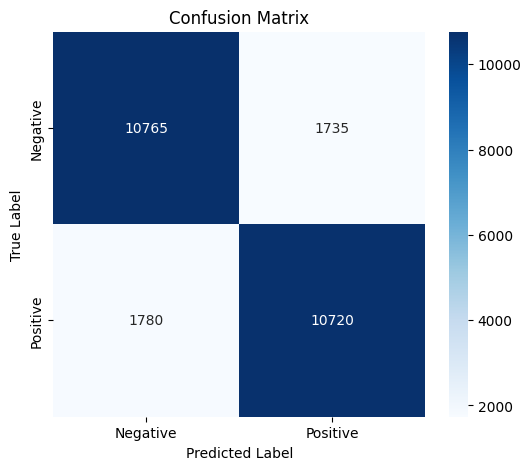

In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np
from tensorflow.keras.datasets import imdb

# ✅ Load IMDB dataset from Keras
(max_words, max_len) = 10000, 200

# Load the IMDB dataset (already split into train/test)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

# ✅ Pad sequences to ensure uniform input size
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

# ✅ Build model
model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    GlobalAveragePooling1D(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# ✅ Compile and train the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

# ✅ Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# ✅ Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Accuracy over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# ✅ Confusion matrix
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

cm = confusion_matrix(y_test, y_pred)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))

# ✅ Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
